In [8]:
import pandas as pd

In [9]:
# Carregando DataFrame (Custumers)
df_netflix = pd.read_csv('./dataset_desafio/netflix_daily_top_10.csv')

## Tipos de dados disponíveis

In [10]:
# Tipos de dados disponíveis
df_netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7100 entries, 0 to 7099
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   As of                 7100 non-null   object
 1   Rank                  7100 non-null   int64 
 2   Year to Date Rank     7100 non-null   object
 3   Last Week Rank        7100 non-null   object
 4   Title                 7100 non-null   object
 5   Type                  7100 non-null   object
 6   Netflix Exclusive     4599 non-null   object
 7   Netflix Release Date  7100 non-null   object
 8   Days In Top 10        7100 non-null   int64 
 9   Viewership Score      7100 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 554.8+ KB


In [11]:
df_netflix.head(10)

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
0,2020-04-01,1,1,1,"Tiger King: Murder, Mayhem …",TV Show,Yes,"Mar 20, 2020",9,90
1,2020-04-01,2,2,-,Ozark,TV Show,Yes,"Jul 21, 2017",5,45
2,2020-04-01,3,3,2,All American,TV Show,NaN,"Mar 28, 2019",9,76
3,2020-04-01,4,4,-,Blood Father,Movie,NaN,"Mar 26, 2020",5,30
4,2020-04-01,5,5,4,The Platform,Movie,Yes,"Mar 20, 2020",9,55
5,2020-04-01,6,6,-,Car Masters: Rust to Riches,TV Show,Yes,"Sep 14, 2018",4,14
6,2020-04-01,7,10,-,Unorthodox,TV Show,Yes,"Mar 26, 2020",2,5
7,2020-04-01,8,7,5,Love is Blind,TV Show,Yes,"Feb 13, 2020",9,40
8,2020-04-01,9,8,-,Badland,Movie,NaN,"Mar 26, 2020",4,11
9,2020-04-01,10,9,-,Uncorked,Movie,Yes,"Mar 27, 2020",4,15


## Período da análise feita

In [16]:
# Transformando valores das colunas 'As of' e 'Netflix Release Date' para o tipo datetime
df_netflix['As of'] = pd.to_datetime(df_netflix['As of'])

In [48]:
data_inicio = df_netflix['As of'].min()
data_fim = df_netflix['As of'].max()

In [49]:
data_inicio

Timestamp('2020-04-01 00:00:00')

In [50]:
data_fim

Timestamp('2022-03-11 00:00:00')

A análise ocorreu entre abril de 2020 até março de 2022

#

## Tamanho da base de dados

In [22]:
df_netflix.shape

(7100, 10)

## Verificar Dados Nulos

In [29]:
df_netflix[df_netflix.isna().any(axis=1)]

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
2,2020-04-01,3,3,2,All American,TV Show,NaN,2019-03-28,9,76
3,2020-04-01,4,4,-,Blood Father,Movie,NaN,2020-03-26,5,30
8,2020-04-01,9,8,-,Badland,Movie,NaN,2020-03-26,4,11
12,2020-04-02,3,3,2,All American,TV Show,NaN,2019-03-28,10,84
15,2020-04-02,6,4,-,Blood Father,Movie,NaN,2020-03-26,6,35
...,...,...,...,...,...,...,...,...,...,...
7090,2022-03-11,1,2,-,The Last Kingdom,TV Show,NaN,2016-07-10,13,62
7092,2022-03-11,3,3,-,Good Girls,TV Show,NaN,2019-01-01,26,149
7097,2022-03-11,8,8,-,Shooter,Movie,NaN,2014-08-01,3,7
7098,2022-03-11,9,9,7,Shrek 2,Movie,NaN,2022-03-01,10,33


## Outliers

<Axes: >

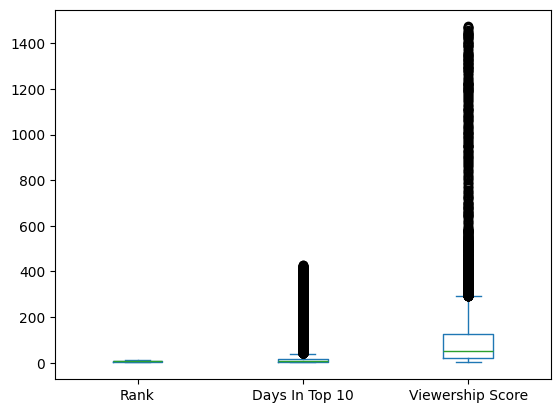

In [34]:
# Verificar os boxplots do dataframe
df_netflix.plot.box()

In [37]:
import numpy as np

In [42]:
q1_netflix = df_netflix['Days In Top 10'].quantile(0.25)
q3_netflix = df_netflix['Days In Top 10'].quantile(0.75)
iqr_netflix = q3_netflix - q1_netflix
iqr_netflix


np.float64(15.0)

In [43]:
limInf_netflix = q1_netflix - (iqr_netflix * 1.5)
limSup_netflix = q1_netflix + (iqr_netflix * 1.5)
limInf_netflix, limSup_netflix

(np.float64(-19.5), np.float64(25.5))

In [44]:
df_netflix[(df_netflix['Days In Top 10'] < limInf_netflix) | (df_netflix['Days In Top 10'] > limSup_netflix)]

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
171,2020-04-18,2,2,1,"Tiger King: Murder, Mayhem …",TV Show,Yes,2020-03-20,26,258
178,2020-04-18,9,7,7,All American,TV Show,NaN,2019-03-28,26,158
182,2020-04-19,3,2,1,"Tiger King: Murder, Mayhem …",TV Show,Yes,2020-03-20,27,266
193,2020-04-20,4,3,1,"Tiger King: Murder, Mayhem …",TV Show,Yes,2020-03-20,28,273
204,2020-04-21,5,4,1,"Tiger King: Murder, Mayhem …",TV Show,Yes,2020-03-20,29,279
...,...,...,...,...,...,...,...,...,...,...
7083,2022-03-10,4,3,3,Inventing Anna,TV Show,Yes,2022-02-11,27,243
7085,2022-03-10,6,5,5,Love is Blind,TV Show,Yes,2020-02-13,45,306
7092,2022-03-11,3,3,-,Good Girls,TV Show,NaN,2019-01-01,26,149
7093,2022-03-11,4,4,3,Inventing Anna,TV Show,Yes,2022-02-11,28,250


<Axes: >

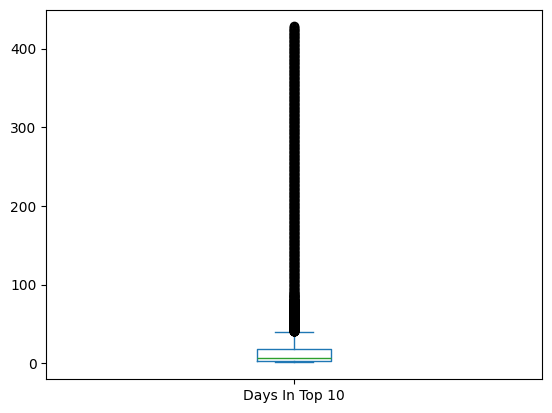

In [31]:
df_netflix['Days In Top 10'].plot.box()

<Axes: >

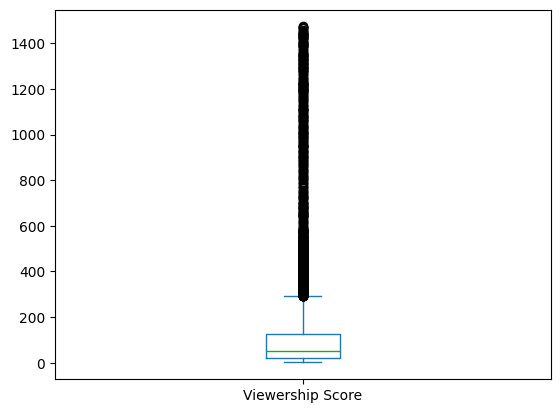

In [32]:
df_netflix['Viewership Score'].plot.box()

In [45]:
q1_viewership = df_netflix['Viewership Score'].quantile(0.25)
q3_viewership = df_netflix['Viewership Score'].quantile(0.75)
iqr_viewership = q3_viewership - q1_viewership
iqr_viewership

np.float64(109.0)

In [46]:
limInf_viewership = q1_viewership - (iqr_viewership * 1.5)
limSup_viewership = q1_viewership + (iqr_viewership * 1.5)
limInf_viewership, limSup_viewership

(np.float64(-144.5), np.float64(182.5))

In [47]:
df_netflix[(df_netflix['Days In Top 10'] < limInf_viewership) | (df_netflix['Days In Top 10'] > limSup_viewership)]

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
3884,2021-04-24,5,4,6,Cocomelon,TV Show,NaN,2020-06-01,183,601
3895,2021-04-25,6,5,7,Cocomelon,TV Show,NaN,2020-06-01,184,606
3905,2021-04-26,6,6,7,Cocomelon,TV Show,NaN,2020-06-01,185,611
3915,2021-04-27,6,6,6,Cocomelon,TV Show,NaN,2020-06-01,186,616
3925,2021-04-28,6,6,3,Cocomelon,TV Show,NaN,2020-06-01,187,621
...,...,...,...,...,...,...,...,...,...,...
6674,2022-01-28,5,6,-,Cocomelon,TV Show,NaN,2020-06-01,424,1466
6687,2022-01-29,8,5,8,Cocomelon,TV Show,NaN,2020-06-01,425,1469
6718,2022-02-01,9,-,7,Cocomelon,TV Show,NaN,2020-06-01,426,1471
6959,2022-02-25,10,-,-,Cocomelon,TV Show,NaN,2020-06-01,427,1472
